# Homework 7: Earthquakes and Source Theory
- **Course:** UAF GEOS604 &mdash; Seismology  
- **Instructor:** Bryant Chow ([bhchow@alaska.edu](bhchow@alaska.edu))
- **Course Website:** [https://bryantchow.com/teaching/geos604](https://bryantchow.com/teaching/geos604) 
- **Last Modified:**  03/18/25

## Semester: Spring 2025
- **Total Points**: 10
- **Assigned**: March 18, 2025
- **Due Date and Time**: March 25, 2025 at the beginning of class

### Suggested Reading
- **Stein and Wysession** Ch 4.2, 4.3, 4.4, 4.6, 4.7

#### Full References
- [SW] Stein S, Wysession M. An introduction to seismology, earthquakes, and earth structure. John Wiley & Sons; 2009 Apr 1. Ch. 2.7 
- [SH] Shearer P M. Introduction to seismology. Cambridge university press; 2019 May 30.

---------
## Submitting Homework

1. If you have handwritten solutions to any problems:  
   a. include them directly in the notebook as a scan/picture in the appropriate section, OR  
   b. scan/photograph and include them separately. please also reference them in the notebook ("see handwritten notes submitted separately")
2. Save your homework as a PDF file using `File` -> `Save and Export Notebook As` -> `PDF`
3. Double check that the output PDF contains all your code, text, and any images you have included
5. Upload your PDF to the class Google Drive (see course website above) before the **Due Date and Time** listed above.

**See the class syllabus section on "Homework Policy" for late policy and information on academic integrity.**

---------------

In [ ]:
# Feel free to import any other packages you need here.
import numpy as np
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
from obspy.geodetics import gps2dist_azimuth, kilometer2degrees
from geos604funcs import plot_polarities, plot_waveforms

%matplotlib widget  

# Problem 1: Moment Magnitudes [3.0]

> 1.1 [0.75] - Consider the [2002 Mw7.9 Denali Fault Earthquake](https://en.wikipedia.org/wiki/2002_Denali_earthquake), which had a **total surface rupture of $\sim$340 km** along the Denali Fault, Totschunda Fault, and Susitna Glacier Thrust Fault.  
> - Although the fault slip occurred on both strike-slip and thrust faults, we'll simplify the situation and just assume that the fault slipped as pure strike-slip motion on a vertically-dipping rectangular fault.
> - **Assume the following:**
>   - An average fault slip of 5 m
>   - An average shear modulus for the fault rock to be [that of granite, about 24 GPa](https://en.wikipedia.org/wiki/Shear_modulus)
>   - That the fault broke the ground surface along its entire length 
> - **Task: Determine the depth (in km) of fault rupture required to achieve a moment magnitude of Mw7.9**.
> - Be careful about the expected units of each quantity.

> 1.2 [0.25] - Does your answer in Part 1.1 make sense? In one or two sentences explain why or why not.

> 1.3 [0.5] - Now do a little bit of research and get an approximate value for the length of the Denali Fault (see note below). Assuming that the entirety of the Denali Fault ruptures from the surface to the brittle-ductile transition zone (20 km), and that the entire fault slips 9m (approximately the maximum slip on the Denali Fault earthquake), **what is the maximum moment magnitude (Mw) achievable?**
>   
> **Note:** *Remember that we're taking logarithms here so a rough order of magnitude is okay, don't get hung up on the details or try to measure the length of the fault directly.*


> 1.4 [0.5] - Now consider a simplified geometry for the [Alaska-Aleutian subduction zone](https://en.wikipedia.org/wiki/Aleutian_Trench), which has a total trench length of 3,400 km, and an average dip of 45$^\circ$. Consider the the entire subduction zone as a dipping rectuangular plane (i.e., ignoring curvature). What is the **maximum moment magnitude (Mw) achievable** if the entire subduction zone slipped **20 m** from the trench to the brittle-ductile transition zone.

> 1.5 [1.0] - Does your answer in 1.4 make sense? Considering the 1964 earthquake was estimated at Mw9.1 but only ruptured a patch of the subduction zone? (Hint, it should not).  
> For **each parameter** involved in the calculation, describe what might be incorrect in our simplification that would have led to this under-prediction of moment release on a full-subduction zone earthquake.

----------
# Problem 2: Surface Wave Magnitude Scale [2.0]

In this problem we will take a look at calculation of the surface wave magnitude scales. 

> 2.1 Run the following code block, which will 1) download waveform data for `IU.COLA.00.BHZ` starting at `2011-03-11T05:45:24` UTC, 2) remove the response to get a waveform in units of **displacement**, and 3) plot using `plot_waveforms` 
```
c = Client("IRIS")
starttime = UTCDateTime("2011-03-11T05:46:24")
endtime = starttime + 60 * 60 * 2
st = c.get_waveforms("IU", "COLA", "10", "BHZ", starttime, endtime, attach_response=True)
st.remove_response(output="DISP")
plot_waveforms(st)
```

> 2.2 [1.0] - The surface wave magnitude is given by $M_s = \log_{10}A_{20} + 1.66 \log_{10} \Delta + 2.0$ where $A_{20}$ is the largest amplitude of the surface waves at a dominant period of 20s, and $\Delta$ is the epicentral distance in degrees. Here we will calculate the surface wave magnitude $M_s$.  
> a. Looking at the **raw waveform**, **identify the time period** where $T\approx20$s and note down $A_{20_{raw}}$  
> b. Filter your seismogram in a very narrow band with a width of $\Delta T = 0.5$s around $T=20$s. Note down $A_{20_{filtered}}$  
> c. Calculate $\Delta$ knowing this earthquake has an **epicentral location** of: 38.322$^\circ$N 142.369$^\circ$E     
> d. Calculate $M_s$ for both parts (a) and (c)

> 2.3 [1.0] - From the location and timing provided in the problem setup, **figure out what earthquake this is**, and the associated  moment magnitude $M_w$. Provide one or two sentences answer the following questions:    
> a. Explain why the two values of $M_s$ that you calculated are different. What might be messing with the raw waveform measurement that you took in 2.2a?  
> b. Why is the value of $M_s$ you calculated in 2.2c different than the catalog $M_w$.  
> c. Using this waveform data only, explain what you might be able to do get your value of $M_s$ closer to the listed $M_w$.   

-------
# Problem 3: First Motion Focal Mechanism [5.0]

Consider the [following earthquake in southern Alaska](https://ds.iris.edu/wilber3/find_stations/5172125). The source mechanism below is described by the [Global Centroid Moment Tensor (GCMT) Project](https://www.globalcmt.org/CMTsearch.html). In this problem we will attempt to fit a focal mechanism that matches their solution using the first motion polarities of stations in Alaska.
```
201601241030A SOUTHERN ALASKA

  Date: 2016/ 1/24   Centroid Time: 10:30:37.4 GMT
  Lat=  59.75  Lon=-153.27
  Depth=110.7   Half duration= 8.8
  Centroid time minus hypocenter time:  7.2
  Moment Tensor: Expo=26  2.390 -5.660 3.270 0.834 3.050 0.965 
  Mw = 7.1    mb = 0.0    Ms = 7.1   Scalar Moment = 5.92e+26
  Fault plane:  strike=313    dip=59   slip=152
  Fault plane:  strike=59    dip=66   slip=34
```

GCMT provides both moment tensor and focal mechanism solutions. We will only be focusing on the focal mechanisms in this problem.  
First let's see what the fault plane looks like, we can use ObsPy to plot our beachballs.
```python
from obspy.imaging.beachball import beachball

nodal_plane = [313, 59, 152]  # strike, dip, rake
beachball(nodal_plane)
```

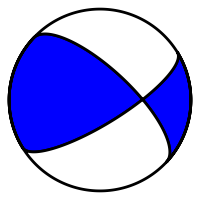

---------

> 3.1 [1.0] The following stations provide good azimuthal coverage around the event location. **For each station in the station list below**:  
>   - Download **vertical component** waveform data and filter it with a **bandpass filter between 1 and 20 Hz** 
>   - Zoom in on the P-wave (first arrival) and **determine the P-wave polarity** of this arrival
>   - Create a `list` and assign a polarity for each station: use "+" for positive first motion, "-" for negative first motion, and "?" for uncertain
>   - **Notes**
>     - We are looking for the polarity of **first bump** past the noise, **not** the polarity of the maximum amplitude  
>     - It's okay if you're uncertain about a pick, you can come back later and revise.
>     - If you are uncertain it helps to leave a comment about what you thought it was.
>     - You do **not** need to show the waveforms or picks in your submitted homework, I will just be looking at your answers to later parts

```python
station_list = {
    # Station Code     Lat    Lon
    "AK.COLD..BHZ":   (67.23, -150.20),
    "CN.YKAW1..BHZ":  (62.48, -114.48),
    "IM.TKL.00.BHZ":  (35.66, -83.77),
    "IM.NV31..BHZ":   (38.43, -118.16),
    "IU.POHA.00.BHZ": (19.76, -155.53),
    "IU.ADK.00.BHZ":  (13.59, 144.87),
    "II.WRAB.00.BHZ": (-19.93, 134.36),
    "II.ERM.00.BHZ":  (42.02, 143.16),
    "IU.YAK.00.BHZ":  (62.03, 129.68), 
    "IU.BILL.00.BHZ": (68.07, 166.45), 
    "AK.RDOG..BHZ":   (68.05, -162.91),
    "IU.KONO.00.BHZ": (9.60,  59.99),
}
```

>  3.2 [0.25] **Calculate** 1) epicentral distance (in units of degrees) and 2) azimuth (in units of degrees) for each station. cCreate one `list` for distance and one for azimuth.

> 3.3 [0.5] In addition to azimuth and polarity, we also need **takeoff angles** to determine where points lie on a stereonet. We will do this with TauP.
> - **Use ObsPy's TauP** (see following code-block) to get takeoff angles for each of the stations.
> - Use the source depth from the GCMT solution above. 
> - Create a `list` of takeoff angles corresponding to each station. 
> - If any station does **not** return a P-wave arrival, **assign a takeoff angle of -1**. This will make sure it is ignored in the later parts of this problem.
```python
from obspy.taup import TauPyModel

model = TauPyModel(model="iasp91")
arrivals = model.get_travel_times(..., phase_list=["P"])  # fill in the variables on your own
print(arrivals[0].takeoff_angle)
```

> 3.4 [0.5] Now let's plot arrivals on a stereonet. Old-school seismology would ask you do this by hand, but we have the power of Python. In `geos604funcs` there is a function called `plot_polarities` that will accept all of the information you just collected and plot data points onto a stereonet.
> - **Using the function `plot_polarities()`** (see below) plot your first motions on a stereonet by providing lists of: station names, takeoff angles, azimuths and polarities. The call structure for the function is shown below.

```python
# Call structure for plot_polarities
from geos604funcs import plot_polarities

plot_polarities(takeoff_angles=[28.5, 89.9], 
                azimuths=[2.3, 30.2],
                polarities=["+", "?"],
                stations=["IU.COLA", "NZ.KAPT"], 
                )
```

> 3.5 [1.0] Now let's try and fit the focal mechanism by choosing the appropriate nodal planes. We will do this with good ole' trial and error.
> - **Define values for strike, dip and rake for a fault plane** and plot them using `plot_polarities()` (see below). The function will automatically generate the appropriate auxiliary plane for you.
> - Once you are satisfied, use the `ObsPy Beachball function` to **plot the same focal mechanism** with colored quadrants. Make sure the P and T axes are colored how you want.
> - **Notes**
>   - Ensure that the nodal planes correctly group positive and negative first motions.
>   - Do **not** try to recreate the actual focal mechanism solution, you will not be graded on that. Just try your best to fit the observations.  
>   - If things are not making sense, go back to your waveforms and check polarities, don't be afraid to mark some with "?".

```python
# Fitting a focal mechanism to your observations
nodal_plane = [101, 85, 27]  # strike, dip, rake
plot_polarities(takeoff_angles, azimuths, polarities, stations,
                nodal_plane)
```

> 3.6 [1.25] Please answer each question with one or two sentences.:  
> a. On your nodal plane figure, **name and describe** each of the features: solid blue line, solid blue marker, open blue circle.  
> b. Consider the points `AK.COLD` and `IU.ADK` on your stereonet. In a few sentences **describe what their different location on the stereonet mean**. Discuss in terms of the takeoff angle and the lower hemisphere projection.  
> c. Describe why some of the stations in Part 1 were more **difficult to find polarities for**. Try to connect this with the geographic locations of the stations.  
> d. **Comment on why your source mechanism differs** from the GCMT solution and **how we could improve the solution**. Try to provide atleast 3 different reasons.  
> e. One of the stations in the list **could not be assigned a takeoff angle** for the P-wave, why is this?  

> 3.7 [0.5] Have a look at the actual focal mechanism provided at the beginning of the problem (also copied below). In class we learned that focal mechanisms define both a fault plane and an auxiliary plane, and slip on either plane would result in the the same radiation pattern, meaning seismic data is ambiguous in determining the actual fault orientation. We require external information to decide which plane actually slipped. Do some research and **make a decision on which plane is correct**, write one or two sentences justifying your decision.



-----------

## Problem N 
1. Approximately how much time did you spend on this homework assignment?
2. Did you find this homework particularly easy, adequate, or difficult?
3. Any feedback on the homework?
